## Занятие 4
## Математический анализ
## Анализ функции. Построение графика в matplotlib.pyplot
https://matplotlib.org
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
https://matplotlib.org/tutorials/text/annotations.html

In [296]:
# Импорт библиотеки matplotlib.pyplot обычно осуществляется так:
import matplotlib.pyplot as plt
from sympy import Symbol, symbols, S, solve, solveset, latex, fraction, Eq, sin, cos, pi
from sympy.calculus.util import continuous_domain
# А для того, чтобы использовать все остальное, сделаем так:
import sympy
import numpy as np

### Задание 1
Найти точки пересечения графика функции $f(x) = (x^2 + 3 x - 2)\log_2(3x+1)$ с осями координат, построить график и отметить точки пересечения.

#### Указание. 
Определить функцию как в Примере 3, поскольку нужно будет использовать функцию  $\log_2(x)$ из каждого пакета sympy и numpy.
В numpy использовать $log2(x)$ для вычисления логарифма по основанию 2.

Строить график только в пределах области определения функции. Точки пересечения с осью OX должны быть не только решениями соответствующего уравнения, но и принадлежать области определения функции.

In [106]:
x = Symbol('x')
def f(x, lib='sympy'):
    if lib == 'sympy':
        log = sympy.log
    elif lib == 'numpy':
        log = np.log
    else:
        return 'Wrong library name, only sympy or numpy is allowed'
    return (x**2 + 3*x - 2) * log(3*x + 1)

In [107]:
roots = solve(f(x))
print(roots)
point_OY = f(0, lib = 'sympy')
point_OY

[0, -3/2 + sqrt(17)/2, -sqrt(17)/2 - 3/2]


0

In [108]:
X = np.linspace(-3, 3, 100)

во избежании дублирования набора (0, 0) закомментируем все строки с методом append:

In [109]:
y_coord = [0] * len(roots) 
#roots.append(0)
#y_coord.append(point_OY)

<ipython-input-106-fe3031f459bf>:9: RuntimeWarning: invalid value encountered in log
  return (x**2 + 3*x - 2) * log(3*x + 1)


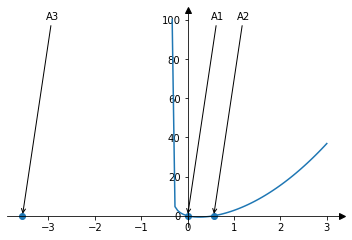

In [110]:
ax = plt.gca() 
for i, x_coord in enumerate(roots): 
    ax.annotate('A' + str(i + 1),
            xy=(x_coord, y_coord[i]), xycoords='data',
            xytext=(x_coord + 0.5, y_coord[i] + 100), textcoords='data', 
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3")) 
ax.spines['right'].set_color('none') # Правая сторона рамки стала бесцветной, но не исчезла!
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0)) # Нижняя сторона рамки переместилась в начало координат
ax.spines['left'].set_position(('data', 0))    
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.plot(X, f(X, 'numpy'))
ax.scatter(roots, y_coord)

### Задание 2
Найти асимптоты графика функции $g(x) = \frac{35x^2 + 4x - 15}{3x - 2}$, построить график и асимптоты, в легенду графика включить формулы функции и асимптот, подписать оси 'x' и 'y'.

In [111]:
def g(x):
    return (35 * x**2 + 4*x - 15) / (3*x - 2)
fnum, fdenom = sympy.fraction(g(x)) 
v_as = sympy.solveset(fdenom, x) 
v_as

FiniteSet(2/3)

In [112]:
y0pos = sympy.limit(g(x), x, +sympy.oo)
y0neg = sympy.limit(g(x), x, -sympy.oo)
y0pos, y0neg

(oo, -oo)

In [113]:
y0pos = g(x).limit(x, +sympy.oo)
y0neg = g(x).limit(x, -sympy.oo)
y0pos, y0neg

(oo, -oo)

In [114]:
kpos = sympy.limit(g(x)/x, x, +sympy.oo)
kneg = sympy.limit(g(x)/x, x, -sympy.oo)
if kpos == kneg:
    k = kpos
else:
    k = (kneg, kpos)
display(k)

35/3

In [115]:
b = sympy.limit(g(x) - k*x, x, sympy.oo)
b

82/9

In [116]:
y_as = k*x +b
y_as

35*x/3 + 82/9

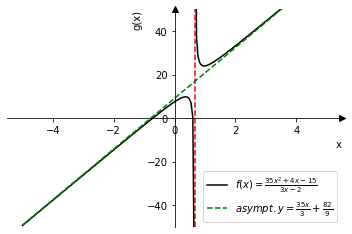

In [117]:
minY = -50  
maxY = 50
ax = plt.gca()
ax.set(ylim=(minY, maxY))
for item in v_as:
    ax.axvline(x=item, color='red', linestyle='--')    
X1 = np.linspace(-5, float(item - 0.01), 100) 
X2 = np.linspace(float(item + 0.01), 5, 100)
Y1 = g(X1)
Y2 = g(X2)
ax.plot(X1, Y1, 'k-', label=r'$f(x)=' + sympy.latex(g(x)) + r'$') # График левой ветви функции
ax.plot(X2, Y2, 'k-') # График правой ветви функции
ax.plot([X1[0], X2[-1]], [y_as.subs(x, X1[0]), y_as.subs(x, X2[-1])], 'g--', 
         label=r'$asympt. y=' + sympy.latex(y_as) + r'$')# График наклонной асимптоты
ax.legend(loc='best')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.set_xlabel('x', loc = 'right')
ax.set_ylabel('g(x)', loc = 'top')
ax.legend(loc = 'lower right')

### Задание 3.
Описать в виде функции траекторию пули, выпущенной со скоростью $v_0$ под углом $\alpha$ к горизонту (по умолчанию $v_0 = 0$, $\alpha = \pi/2$)
$$
\left\{
\begin{matrix}
x=v_0t\cos\alpha\\
y=v_0t\sin\alpha-\frac{10t^2}{2}
\end{matrix}
\right.
$$
Аргументы функции $t$, $v_0$ и $\alpha$, результат - два выражения $x$ и $y$, в соответствии с формулами, приведенными выше.

Определить соответствующий набору параметров $v_0$ и $\alpha$ диапазон значений параметра времени $t$, учитывая, что пуля не должна провалиться сквозь землю. 

Построить траектории при заданных значениях начальной скорости и угла на одном графике (($v_0 = 1$, $\alpha = \pi/6$), ($v_0 = 2$, $\alpha= \pi/4$), ($v_0 = 2$, $\alpha = 1$)). Графики должны быть соответственно зеленого, красного и черного цвета. 

Подписать оси $x$, $y$.

В легенде отразить значения параметров, например, $v_0 = 2,\ \alpha = \pi/6$.

Название графика - Траектории пуль.
#### Указание.
Использовать $\sin$ из numpy.

Решить уравнение $y = 0$ относительно $t$, пользуясь solve или solveset, чтобы с помощью найденного значения $t$ определить правую границу значений $x$.

#### Решение.
Определим функцию, зададим списком данные наборы параметров ($v_0 = 1$, $\alpha = \pi/6$), ($v_0 = 2$, $\alpha= \pi/4$), ($v_0 = 2.5$, $\alpha = 1$) и найдем значение параметра $t$, при котором  $y = 0$. Затем подстановкой subs в t_interval найдем наибольшее значение $t$ и построим графики:

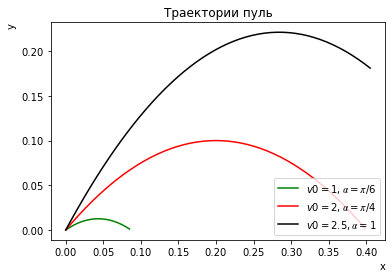

In [228]:
t = Symbol('t')
t2 = Symbol('t2')
t = np.linspace(0,0.3,50)
def f(t, v0 = 0, alph = pi/2):
  return v0*t*cos(alph), v0*t*sin(alph) - 10*t**2/2

ax = plt.gca()
ax.set_title(r'Траектории пуль')
#print(solve(Eq(f(t2,1,pi/6),1),t2))
X,Y=f(t,1,pi/6)
Y = np.ma.masked_where(Y < 0, Y)
ax.plot(X, Y, color='green', label = "$v0=1, 𝛼=𝜋/6$")
X,Y=f(t,2,pi/4)
Y = np.ma.masked_where(Y < 0, Y)
ax.plot(X, Y, color='red', label = "$v0=2, 𝛼=𝜋/4$")
X,Y=f(t,2.5,1)
Y = np.ma.masked_where(Y < 0, Y)
ax.plot(X, Y, color='black', label = "$v0=2.5, 𝛼=1$")
ax.set_xlabel('x', loc = 'right')
ax.set_ylabel('y', loc = 'top')
ax.legend(loc = 'lower right')


### Индивидуальное задание.
Построить в одной координатной плоскости графики функций.

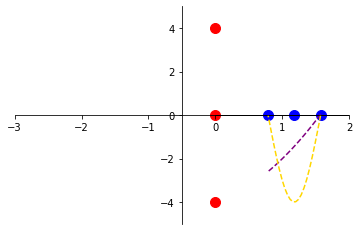

In [315]:
x = np.linspace(np.pi/2, np.pi/4, 20)
def f(x): return x**2 + x - 4
def g(x): return 4 * np.sin(4 * x)
ax = plt.gca()
ax.plot(x, f(x), color = 'purple', linestyle = '--')
ax.plot(x, g(x), color = 'gold', linestyle = '--')
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.hlines(0, 0, 10, color = 'black',linewidth = 1,linestyle = '-')
ax.axis([-3, 2, -5, 5])
ax.hlines(0, 0, 10, color = 'black',linewidth = 1,linestyle = '-')
ax.scatter([0, 0, 0], [-4, 0, 4], s = 100, c = 'r')
ax.scatter([np.pi/4, np.pi/4 + np.pi/8, np.pi/2], [0, 0, 0], s = 100, c = 'b')

Хорасанджян Левон, вариант №157